# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

# Importing the required libraries

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.gridspec import GridSpec

from scipy.special import gamma

# Parameters of the animation

In [2]:
normal_loc, normal_scale = -2.5, 1
gamma_shape, gamma_scale = 2, 1.5
exponential_scale, exponential_shift = 2, 7
uniform_low, uniform_high = 14, 20

# number_frames*batch_size should be equal to number_elements
number_elements = 10000
number_frames = 20
batch_size = 500

bins_len = 50

# Animation

<IPython.core.display.Javascript object>


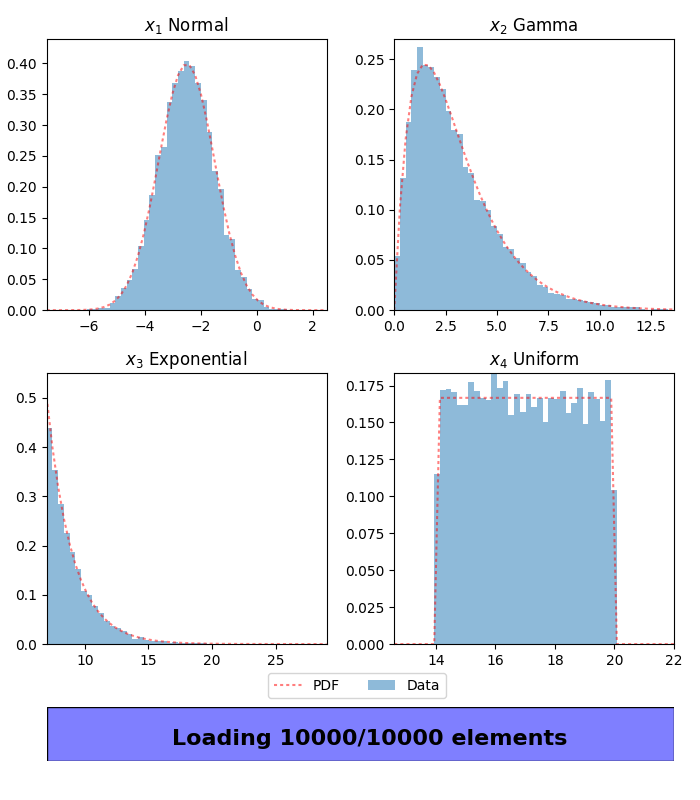

In [3]:
x1 = np.random.normal(normal_loc, normal_scale, number_elements)
normal_bins = np.linspace(normal_loc - 5*normal_scale,
                          normal_loc + 5*normal_scale,
                         bins_len)
ymax_normal = 1.1/(normal_scale*np.sqrt(2*np.pi))

x2 = np.random.gamma(gamma_shape, gamma_scale, number_elements)
gamma_bins = np.linspace(max(0, gamma_scale*(gamma_shape - 5*np.sqrt(gamma_shape))),
                         gamma_scale*(gamma_shape + 5*np.sqrt(gamma_shape)),
                         bins_len)
ymax_gamma = 1.1*(gamma_shape - 1)**(gamma_shape - 1)*np.exp(1 - gamma_shape)/(gamma_scale*gamma(gamma_shape))

x3 = np.random.exponential(exponential_scale, number_elements) + exponential_shift
exponential_bins = np.linspace(max(exponential_scale*(1 - 5*exponential_scale), 0) + exponential_shift,
                              exponential_scale*(1 + 5*exponential_scale) + exponential_shift,
                              bins_len)
ymax_exponential = 1.1/exponential_scale

x4 = np.random.uniform(uniform_low, uniform_high, number_elements)
uniform_bins = np.linspace(0.9*uniform_low,
                          1.1*uniform_high,
                          bins_len)
ymax_uniform = 1.1/(uniform_high - uniform_low)

y1_list = []
y2_list = []
y3_list = []
y4_list = []

for i in range(1, number_frames + 1):
    y1, _ = np.histogram(x1[:(i*batch_size)], normal_bins, normed = True)
    y2, _ = np.histogram(x2[:(i*batch_size)], gamma_bins, normed = True)
    y3, _ = np.histogram(x3[:(i*batch_size)], exponential_bins, normed = True)
    y4, _ = np.histogram(x4[:(i*batch_size)], uniform_bins, normed = True)

    y1_list.append(y1)
    y2_list.append(y2)
    y3_list.append(y3)
    y4_list.append(y4)

y_list = [y1_list, y2_list, y3_list, y4_list]

gspec = GridSpec(3, 2, height_ratios = [5, 5, 1])
fig = plt.figure(figsize=(7,8))

ax1 = plt.subplot(gspec[0,0])
ax1.set_title('$x_1$ Normal')
_, _, bc_normal = ax1.hist(x1[:batch_size], normed=True, bins=normal_bins, alpha=0.5)
ax1.plot(normal_bins, 
         (1/(normal_scale*np.sqrt(2*np.pi)))*np.exp(-(normal_bins - normal_loc)**2/(2*normal_scale**2)), 
         color='red', linestyle='dotted', alpha=0.5)
ax1.set_xlim(np.min(normal_bins), np.max(normal_bins))
ax1.set_ylim(0, ymax_normal)

ax2 = plt.subplot(gspec[0,1])
ax2.set_title('$x_2$ Gamma')
_, _, bc_gamma = ax2.hist(x2[:batch_size], normed=True, bins=gamma_bins, alpha=0.5)
ax2.plot(gamma_bins, 
         1/(gamma_scale**gamma_shape*gamma(gamma_shape))*gamma_bins**(gamma_shape-1)*np.exp(-gamma_bins/gamma_scale), 
         color='red', linestyle='dotted', alpha=0.5)
ax2.set_xlim(np.min(gamma_bins), np.max(gamma_bins))
ax2.set_ylim(0, ymax_gamma)

ax3 = plt.subplot(gspec[1,0])
ax3.set_title('$x_3$ Exponential')
_, _, bc_exponential = ax3.hist(x3[:batch_size], normed=True, bins=exponential_bins, alpha=0.5)
ax3.plot(exponential_bins, 
         (1/exponential_scale)*np.exp(-(exponential_bins-exponential_shift)/exponential_scale), 
         color='red', linestyle='dotted', alpha=0.5)
ax3.set_xlim(np.min(exponential_bins), np.max(exponential_bins))
ax3.set_ylim(0, ymax_exponential)

ax4 = plt.subplot(gspec[1,1])
ax4.set_title('$x_4$ Uniform')
_, _, bc_uniform = ax4.hist(x4[:batch_size], normed=True, bins=uniform_bins, alpha=0.5) # bins = 20
ax4.plot(uniform_bins, 
         0.5/(uniform_high - uniform_low)*(np.sign(uniform_bins - uniform_low) - np.sign(uniform_bins - uniform_high)), 
         color='red', linestyle='dotted', alpha=0.5)
ax4.set_xlim(np.min(uniform_bins), np.max(uniform_bins))
ax4.set_ylim(0, ymax_uniform)

plt.legend(['PDF', 'Data'], loc=(-0.45,-0.2), ncol=2)

ax_pb = plt.subplot(gspec[2,:])
ax_pb.axis('off')
progress_bar = plt.Rectangle((0,0), 0, 1, facecolor='b', edgecolor='none', alpha=0.5, zorder=1)
ax_pb.add_patch(progress_bar)
ax_pb.add_patch(plt.Rectangle((0,0), 1, 1, facecolor='none', edgecolor='k', linewidth=1, zorder=2))
progress_bar_text = ax_pb.text(0.2, 0.3, 'Loading 8/10 elements', fontdict={'size':16, 'weight': 'bold'})


plt.tight_layout()

def animate(frame):
    for height, rect in zip(y1_list[frame - 1], bc_normal):
        rect.set_height(height)
    for height, rect in zip(y2_list[frame - 1], bc_gamma):
        rect.set_height(height)
    for height, rect in zip(y3_list[frame - 1], bc_exponential):
        rect.set_height(height)
    for height, rect in zip(y4_list[frame - 1], bc_uniform):
        rect.set_height(height)
    progress_bar.set_width((frame*batch_size)/number_elements)
    progress_bar_text.set_text('Loading {}/{} elements'.format(frame*batch_size, number_elements))

a = animation.FuncAnimation(fig, animate, frames = number_frames + 1, interval = 500, repeat = False)
a.save('animation.mp4')